**DISCENTE**: ISABELA VICTÓRIA DE NOVAIS ROMANATO - **RM**: 550234

In [457]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



k: número de eventos
e: número de Euler
λ: é a média

P(k) = [λ^k * e^(-λ)] / k!


In [472]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math
from sklearn.linear_model import PoissonRegressor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

size = 1000
mean = 2
data = poisson.rvs(mu=mean, size=size)


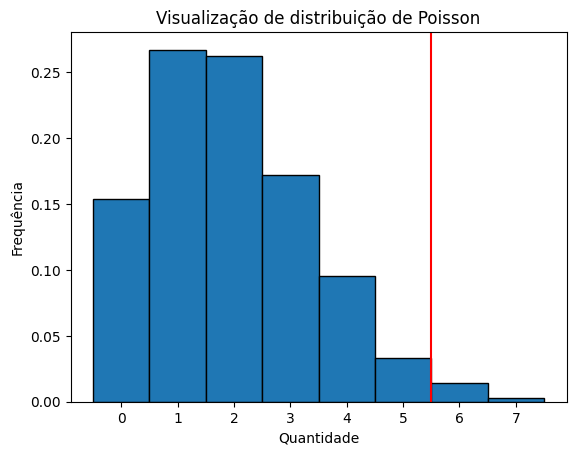

In [459]:
plt.hist(data, bins=range(min(data), max(data)+1), align='left', density=True, edgecolor='black')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.title('Visualização de distribuição de Poisson')

plt.axvline(x=5.5, color='Red')
plt.show()



In [460]:
# probabilidade
# ppf, cdf

k = 0
print(poisson.pmf(k, mean))

0.1353352832366127


In [461]:
# probabilidade aculada
k = 5
print(1 - poisson.cdf(k, mean))


0.016563608480614445


In [462]:
# qual a probabilidade do meu número, numa distribuição do Poisson ser 0 ou ser maior do que 5
k1 = 0
k2 = 5
p1 = poisson.cdf(k1, mean)
p2 = 1 - poisson.cdf(k2, mean)
p_total = p1 + p2
print("A probabilidade do meu valor ser 0 ou >5 é ", p_total)

# Exercício
# Calcular a probabilidade do meu valor em uma distribuição de Poisson ser igual a 1, 3 ou 5 para média 3.


A probabilidade do meu valor ser 0 ou >5 é  0.15189889171722715


In [463]:
# Calcular a probabilidade do meu valor em uma distribuição de Poisson ser igual a 1, 3 ou 5 para média 3.

mean = 3

# 1
k = 1
p1 = poisson.pmf(k, mean)

# 3
k = 3
p2 = poisson.pmf(k, mean)

# 5
k = 5
p3 = poisson.pmf(k, mean)

# probabilidade total
p_total = p1 + p2 + p3

print("A probabilidade do meu valor ser 1, 3 ou 5 é ", p_total)


A probabilidade do meu valor ser 1, 3 ou 5 é  0.4742218262039042


In [464]:
# Distribuição de Poisson
#
# O Y (a variável de interesse) tem a distribuição semelhante a curva de Poisson
# Cross validation => Validação cruzada

file = '/content/drive/MyDrive/datasets/comptagesvelo2015.csv'
df = pd.read_csv(file)
df


,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,11/11/2015,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
315,12/11/2015,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
316,13/11/2015,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258
317,14/11/2015,00:00,979,759,978,322,NaN,1112,290,310,...,266.0,1061,1448,269,70,1876.0,640,805,737,73


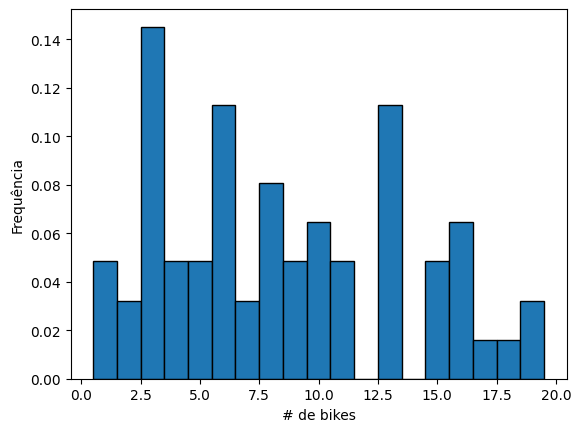

In [465]:

df1 = df[['Maisonneuve_1','Maisonneuve_2','Maisonneuve_3']]
df1 = df1.dropna(how='any')
df1['Maisonneuve_1'] = df1['Maisonneuve_1'] / 10
df1['Maisonneuve_1'] = df1['Maisonneuve_1'].astype(int)

df1['Maisonneuve_2'] = df1['Maisonneuve_2'] / 10
df1['Maisonneuve_2'] = df1['Maisonneuve_2'].astype(int)

df1['Maisonneuve_3'] = df1['Maisonneuve_3'] / 10
df1['Maisonneuve_3'] = df1['Maisonneuve_3'].astype(int)

# Maisonneuve_1: variável de interesse (Y)
# Maisonneuve_2, Maisonneuve_3: regressores escolhidos

values = df1['Maisonneuve_1'].to_numpy()
plt.hist(values, bins=range(min(values), max(values)+1), align="left", density=True, edgecolor="Black")
plt.xlabel("# de bikes")
plt.ylabel("Frequência")
plt.show()


### Exercício para casa:

- Valendo 0,5 pontos no Checkpoint 2;

- Completar o exercício utilizando **bases de treino e bases de teste**.

- Avaliar qual seria o melhor modelo considerando a performance do mesmo no teste.

In [466]:
df1.count()

Maisonneuve_1    62
Maisonneuve_2    62
Maisonneuve_3    62
dtype: int64

In [467]:
# Dividir minha base total em teste e treino

# #saber quantas linhas
#df.count()

# dividir minha base total em base de treino - usar metade
df1_train = df1.sample(31)

# retirar da base principal os meus treinos
df1 = df1.drop(df1_train.index)

samples = []
for i in range(10):
  samples.append(df1.sample(3))

  print(samples)

[    Maisonneuve_1  Maisonneuve_2  Maisonneuve_3
59              6             11              2
3               1              3              2
47             11             27              6]
[    Maisonneuve_1  Maisonneuve_2  Maisonneuve_3
59              6             11              2
3               1              3              2
47             11             27              6,     Maisonneuve_1  Maisonneuve_2  Maisonneuve_3
15             10             28              5
30              3              9              2
19             13             30              4]
[    Maisonneuve_1  Maisonneuve_2  Maisonneuve_3
59              6             11              2
3               1              3              2
47             11             27              6,     Maisonneuve_1  Maisonneuve_2  Maisonneuve_3
15             10             28              5
30              3              9              2
19             13             30              4,     Maisonneuve_1  Maisonneuve_2

In [468]:
# Criei minhas variáveis de treino
X_train = df1_train[['Maisonneuve_2', 'Maisonneuve_3']].to_numpy()
Y_train = df1_train['Maisonneuve_1'].to_numpy()

In [469]:
#Poisson
model = linear_model.PoissonRegressor()
x = df1[['Maisonneuve_2','Maisonneuve_3']].to_numpy()
y = df1['Maisonneuve_1'].to_numpy()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.77

# Regressão Linear
model_linear = linear_model.LinearRegression()
model.fit(x, y)
print(model.score(x, y)) # R^2: 0.78

# Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)
model_poly = linear_model.LinearRegression()
model_poly.fit(x_poly, y)
score_polynomial = model_poly.score(x_poly, y)
print(score_polynomial)

# Validação cruzada:
# se o R² do modelo linear for maior que o R² do Poisson, então Linear é o melhor modelo
# se o R² do modelo linear for menor que o R² do Poisson, então Poisson é o melhor modelo

0.7574265677561375
0.7574265677561375
0.8137134388133394


In [470]:
# # Criei meu modelo de Regressão Linear
# model_linear = LinearRegression()
# model_linear.fit(X_train, Y_train)
# score_linear = model_linear.score(X_train, Y_train)

# # Criei meu modelo de Regressão Polinomial
# poly_features = PolynomialFeatures(degree=3)
# X_poly_train = poly_features.fit_transform(X_train)
# model_poly = LinearRegression()
# model_poly.fit(X_poly_train, Y_train)
# score_polynomial = model_poly.score(X_poly_train, Y_train)

# # Criei meu modelo de Regressão de Poisson
# model_poisson = PoissonRegressor()
# model_poisson.fit(X_train, Y_train)
# score_poisson = model_poisson.score(X_train, Y_train)

# Começar a testar o modelo
test_score_linear = []
test_score_polynomial = []
test_score_poisson = []

for sample in samples:
    # Criando variáveis X, Y para regressão linear
    X_test = sample[['Maisonneuve_2', 'Maisonneuve_3']].to_numpy()
    Y_test = sample['Maisonneuve_1'].to_numpy()
    test_score_linear.append(model.score(X_test, Y_test))

    # Criando variável polinomial para o X
    X_test_poly = poly_features.fit_transform(X_test)
    test_score_polynomial.append(model_poly.score(X_test_poly, Y_test))

    # Avaliando o modelo de Regressão de Poisson
    test_score_poisson.append(model.score(X_test, Y_test))

alpha = 0.1

# Teste de hipóteses para a Regressão Linear
t_stat, p_valor = stats.ttest_1samp(test_score_linear, popmean=score_linear)
print("Regressão Linear:")
print("Score de treino:", score_linear)
print("P-valor:", p_valor)
if p_valor < alpha:
    print("Aceito H1 e rejeito H0")
else:
    print("Aceito H0 e rejeito H1")

# Teste de hipóteses para a Regressão Polinomial
t_stat, p_valor = stats.ttest_1samp(test_score_polynomial, popmean=score_polynomial)
print("\nRegressão Polinomial:")
print("Score de treino:", score_polynomial)
print("P-valor:", p_valor)
if p_valor < alpha:
    print("Aceito H1 e rejeito H0")
else:
    print("Aceito H0 e rejeito H1")

# Teste de hipóteses para a Regressão de Poisson
t_stat, p_valor = stats.ttest_1samp(test_score_poisson, popmean=score_poisson)
print("\nRegressão de Poisson:")
print("Score de treino:", score_poisson)
print("P-valor:", p_valor)
if p_valor < alpha:
    print("Aceito H1 e rejeito H0")
else:
    print("Aceito H0 e rejeito H1")

Regressão Linear:
Score de treino: 0.5731534806376208
P-valor: 0.04321348580813535
Aceito H1 e rejeito H0

Regressão Polinomial:
Score de treino: 0.8137134388133394
P-valor: 0.696854481841322
Aceito H0 e rejeito H1

Regressão de Poisson:
Score de treino: 0.7948879814404868
P-valor: 0.2772872887550622
Aceito H0 e rejeito H1


O melhor modelo, com base nos resultados apresentados, é o **Modelo de Regressão Linear**.

**Justificativa:**

A regressão linear apresenta o menor p-valor (0.043), que é inferior ao nível de significância usual (0.05). Isso significa que há evidências suficientes para rejeitar a H0 e concluir que existe uma relação linear significativa entre as variáveis.
Os p-valores da regressão polinomial (0.697) e da regressão de Poisson (0.277) são maiores que 0.05, o que significa que não há evidências suficientes para rejeitar a H0.

**Conclusão Final:**

Com base nos resultados, podemos concluir que existe uma relação linear significativa entre as variáveis na regressão linear.
As regressões polinomial e de Poisson não apresentaram significância estatística. Sendo que, "Poisson entrega um sigma menor do que o modelo Linear. Isso ocorre porque Poisson tem um ajuste melhor à dados desconhecidos, muito embora ele possa ter um R² menor do que regressão Linear". (ref. Nemec)





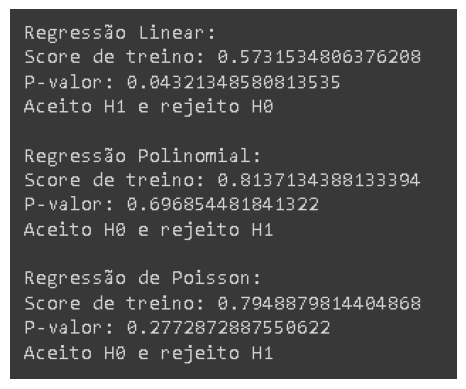

In [473]:
img = mpimg.imread('/content/drive/MyDrive/datasets/Capture.PNG')
plt.imshow(img)
plt.axis('off')
plt.show()

In [471]:
# PRIMEIRA TENTATIVA

# alpha = 0.1

# # Dividir os dados em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# # Treinar os modelos
# model_poisson = linear_model.PoissonRegressor()
# model_poisson.fit(X_train, y_train)

# model_linear = linear_model.LinearRegression()
# model_linear.fit(X_train, y_train)

# # Avaliar os modelos no teste
# score_poisson = model_poisson.score(X_test, y_test)
# score_linear = model_linear.score(X_test, y_test)

# # Realizar o teste de hipóteses
# p_valor = stats.f_oneway(y_test - model_poisson.predict(X_test), y_test - model_linear.predict(X_test))[1]

# # Selecionar o melhor modelo
# if p_valor < alpha:
#   print('O modelo Linear é significativamente melhor que o modelo Poisson')
# else:
#   print('O modelo Poisson é significativamente melhor que o modelo Linear')